MLP

ASSIGNMENT - 3 

SUBMITTED BY:                                              
HRITHIK JOHRI                                             
18BCS6145
AI ML 2
GROUP B

SUBMITTED TO:
Prof.SHIFALI SHARMA


"""""  Diabetes in Pima Indian Women """""

Introduction

A population of women who were at least 21 years old, of Pima Indian heritage and living near Phoenix,
Arizona, was tested for diabetes according to World Health Organization criteria. The data was collected
by the US National Institute of Diabetes and Digestive and Kidney Diseases. For this course, you have
been provided with a cleaned up version of that data, containing 392 observations


In [1]:

# importing pandas
# importing numpy

import numpy as np
import pandas as pd

In [2]:
# import the dataset

diabetes_indian = pd.read_csv("F://4.csv")

In [3]:
diabetes_indian.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140,3449,10.5,70,1,ford torino,17.0


In [4]:
diabetes_indian.shape

(398, 9)

In [5]:
diabetes_indian.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,-1404.643216,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,12213.424763,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,-100000.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [7]:
# checking for any null or missing value
len(diabetes_indian[diabetes_indian.isnull().sum(axis=1) > 0].index  )

0

In [6]:
diabetes_indian.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
mpg             0
dtype: int64

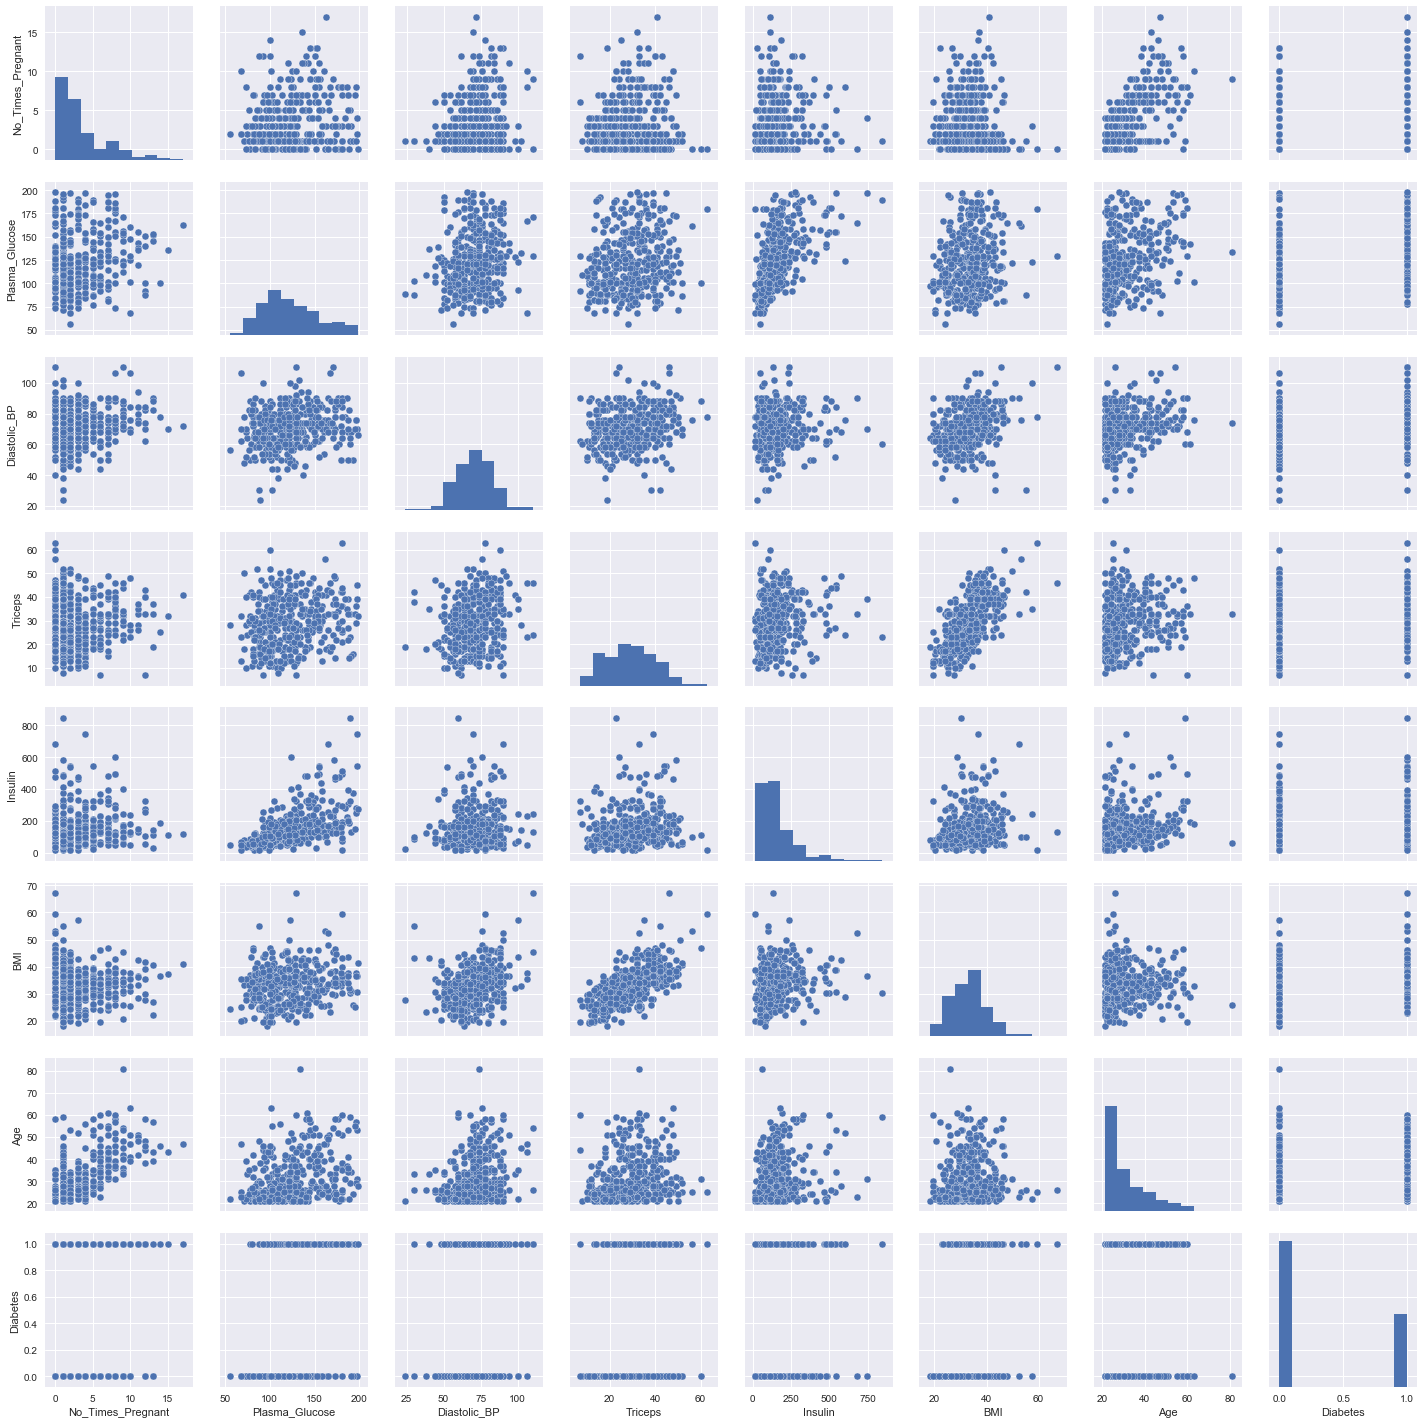

In [11]:
# visualizing the given data

import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(diabetes_indian)
plt.show()

--------------------------------------------------------------------------------------------------------------------------------




Standardise Variables

In this Portion First, we will have to split the dataset into training and testing data sets,in the ratio 70:30.we have
to use a random state of 100 for the splitting

Second Thing we have to do is, we have to scale the 7 continuous variables and find which one of them has the
the highest median.


In [12]:
from sklearn.model_selection import train_test_split

In [16]:
#Splitting the data into two parts train and test in ratio 70:30

train_x,test_x = train_test_split(diabetes_indian, train_size = 0.7,test_size =0.3,random_state =100)


In [17]:
# Inspection of training data

train_x

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
169,9,152,78,34,171,34.2,33,1
265,6,129,90,7,326,19.6,60,0
386,1,121,78,39,74,39.0,28,0
241,6,154,78,41,140,46.1,27,0
249,1,139,62,41,480,40.7,21,0
178,1,196,76,36,249,36.5,29,1
362,2,127,46,21,335,34.4,22,0
19,9,171,110,24,240,45.4,54,1
26,0,100,88,60,110,46.8,31,0
297,2,98,60,17,120,34.7,22,0


In [18]:
# Inspection of Testing data Checking

test_x

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
124,11,155,76,28,150,33.3,51,1
140,0,107,62,30,74,36.6,25,1
276,8,100,74,40,215,39.4,43,1
252,4,125,70,18,122,28.9,45,1
326,1,100,74,12,46,19.5,28,0
136,1,119,86,39,220,45.6,29,1
369,1,108,60,46,178,35.5,24,0
132,10,129,76,28,122,35.9,39,0
387,0,181,88,44,510,43.3,26,1
174,3,99,62,19,74,21.8,26,0


--------------------------------------------------------------------------------------------------------------------------------


checking the ratio of training and testing data




In [19]:
print("Ratio of Training data :-",round((len(train_x.index)/392)*100))
print("Ratio of Testing Data :-",round((len(test_x.index)/392)*100))


Ratio of Training data :- 70
Ratio of Testing Data :- 30


In [20]:
# Importing MinMaxScaler for standardising variables.

from sklearn.preprocessing import MinMaxScaler


Creating a dataframe including seven continuous variables scales


In [24]:

s = MinMaxScaler()
diabetes_indian = pd.DataFrame(s.fit_transform(diabetes_indian), columns=diabetes_indian.columns)


In [25]:
#Inspection of standardised dataframe

diabetes_indian


,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,0.058824,0.232394,0.488372,0.285714,0.096154,0.202454,0.000000,0.0
1,0.000000,0.570423,0.186047,0.500000,0.185096,0.509202,0.200000,1.0
2,0.176471,0.154930,0.302326,0.446429,0.088942,0.261759,0.083333,1.0
3,0.117647,0.992958,0.534884,0.678571,0.635817,0.251534,0.533333,1.0
4,0.058824,0.936620,0.418605,0.285714,1.000000,0.243354,0.633333,1.0
5,0.294118,0.774648,0.558140,0.214286,0.193510,0.155419,0.500000,1.0
6,0.000000,0.436620,0.697674,0.714286,0.259615,0.564417,0.166667,1.0
7,0.058824,0.330986,0.069767,0.553571,0.082933,0.513292,0.200000,0.0
8,0.058824,0.415493,0.534884,0.410714,0.098558,0.335378,0.183333,1.0
9,0.176471,0.492958,0.744186,0.607143,0.265625,0.431493,0.100000,0.0


In [27]:
#Median Calculation

diabetes_indian.median()

No_Times_Pregnant    0.117647
Plasma_Glucose       0.443662
Diastolic_BP         0.534884
Triceps              0.392857
Insulin              0.134014
BMI                  0.306748
Age                  0.100000
Diabetes             0.000000
dtype: float64

From the above data, we can say that Diastolic_BP has the highest median which is 0.534.


--------------------------------------------------------------------------------------------------------------------------------

p-values

we have to create a logistic Regression model with the statsmodels GLM() function.
The model will be built on the training dataset.
From the model we have to find out what is the approximate p-value of the variable Triceps.

Importing libraries sm and smf from statsmodels and statsmodels.formula.api


In [28]:

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [29]:
#formula differentiate Dependent and Independent variable.

formula = 'Diabetes ~ No_Times_Pregnant+Plasma_Glucose+Diastolic_BP+Triceps+Insulin+BMI+Age'

--------------------------------------------------------------------------------------------------------------------------------



Creating a logistic regression model using Generaized lenear model function

In [31]:
#Creating a logistic regression model using Generaized lenear model function

model = smf.glm(formula = formula,data=train_x, family=sm.families.Binomial())
res = model.fit()

In [32]:
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Diabetes   No. Observations:                  274
Model:                            GLM   Df Residuals:                      266
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -122.11
Date:                Sat, 11 Apr 2020   Deviance:                       244.22
Time:                        16:16:51   Pearson chi2:                     264.
No. Iterations:                     7                                         
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -9.3241      1.366     -6.824      0.000       -12.002    -6.646
No_Times_Pregnant     0.0916   

In [33]:
#checking approximate p-value of the variable Triceps

print("Triceps p-value :-",res.pvalues.Triceps)


Triceps p-value :- 0.50405507833


--------------------------------------------------------------------------------------------------------------------------------

RFE

Now, we have to to use RFE to select 5 variables out of seven continuous variables and choose two variables which are not
selected by RFE.

Importing RFE and Linear Regression from sklearn

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
model2 = LinearRegression()
Rfe = RFE(model2,5)


In [36]:
#x :- seven Continous Variables

x = train_x.iloc[:, 0:7]

#y :- Target variable

y = train_x.iloc[:, 7]

In [37]:
#Applying fit function

r = Rfe.fit(x, y)


In [38]:
#Support shows a particular variable is selected or not

r.support_


array([ True,  True, False,  True, False,  True,  True], dtype=bool)

In [39]:
#Rank 1 means feature is selected
r.ranking_


array([1, 1, 2, 1, 3, 1, 1])

From the above ranking data Diastolic_BP and Insulin are the two variables that are not selected by RFE



                                      thankyou